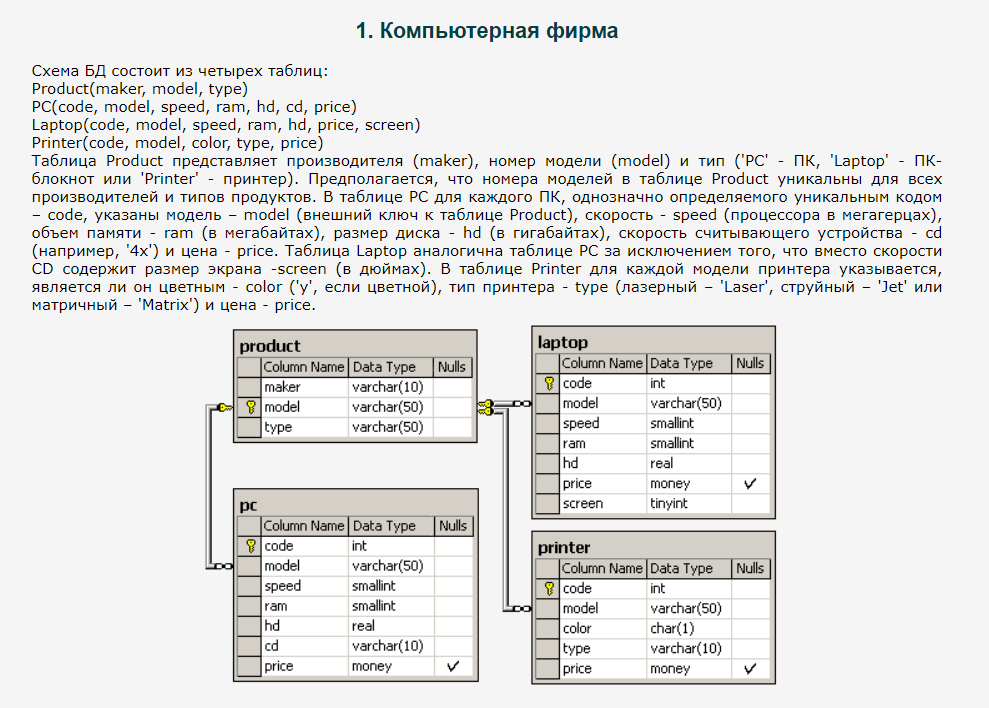

In [1]:
import sqlite3
import pandas as pd
conn_sqlite = sqlite3.connect('TestDB.db')
c = conn_sqlite.cursor()

In [2]:
#Создание локальной БД
request = """
drop table if exists Laptop;
drop table if exists PC;
drop table if exists Printer;
drop table if exists Product;

CREATE TABLE Laptop (
	code int NOT NULL ,
	model varchar (50) NOT NULL ,
	speed smallint NOT NULL ,
	ram smallint NOT NULL ,
	hd real NOT NULL ,
	price decimal(12,2) NULL ,
	screen smallint NOT NULL
)
;

CREATE TABLE PC (
	code int NOT NULL ,
	model varchar (50) NOT NULL ,
	speed smallint NOT NULL ,
	ram smallint NOT NULL ,
	hd real NOT NULL ,
	cd varchar (10) NOT NULL ,
	price decimal(12,2) NULL
)
;

CREATE TABLE Product (
	maker varchar (10) NOT NULL ,
	model varchar (50) NOT NULL ,
	type varchar (50) NOT NULL
)
;

CREATE TABLE Printer (
	code int NOT NULL ,
	model varchar (50) NOT NULL ,
	color char (1) NOT NULL ,
	type varchar (10) NOT NULL ,
	price decimal(12,2) NULL
)
;
----Product------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
insert into Product values('B','1121','PC');
insert into Product values('A','1232','PC');
insert into Product values('A','1233','PC');
insert into Product values('E','1260','PC');
insert into Product values('A','1276','Printer');
insert into Product values('D','1288','Printer');
insert into Product values('A','1298','Laptop');
insert into Product values('C','1321','Laptop');
insert into Product values('A','1401','Printer');
insert into Product values('A','1408','Printer');
insert into Product values('D','1433','Printer');
insert into Product values('E','1434','Printer');
insert into Product values('B','1750','Laptop');
insert into Product values('A','1752','Laptop');
insert into Product values('E','2113','PC');
insert into Product values('E','2112','PC');

----PC------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
insert into PC values(1,'1232',500,64,5,'12x','600');
insert into PC values(2,'1121',750,128,14,'40x','850');
insert into PC values(3,'1233',500,64,5,'12x','600');
insert into PC values(4,'1121',620,128,14,'40x','850');
insert into PC values(5,'1121',600,128,8,'40x','850');
insert into PC values(6,'1233',710,128,20,'50x','950');
insert into PC values(7,'1232',500,32,10,'12x','400');
insert into PC values(8,'1232',450,64,8,'24x','350');
insert into PC values(9,'1232',400,32,10,'24x','350');
insert into PC values(10,'1260',500,32,10,'12x','350');
insert into PC values(11,'1233',900,128,40,'40x','980');
insert into PC values(12,'1233',800,128,20,'50x','970');


----Laptop------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
insert into Laptop values(1,'1298',350,32,4,'700',11);
insert into Laptop values(2,'1321',520,64,8,'970',12);
insert into Laptop values(3,'1750',750,128,12,'1200',14);
insert into Laptop values(4,'1298',600,64,10,'1050',15);
insert into Laptop values(5,'1752',750,128,10,'1150',14);
insert into Laptop values(6,'1298',450,64,10,'950',12);


----Printer------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
insert into Printer values(1,'1276','n','Laser','400');
insert into Printer values(2,'1433','y','Jet','270');
insert into Printer values(3,'1434','y','Jet','290');
insert into Printer values(4,'1401','n','Matrix','150');
insert into Printer values(5,'1408','n','Matrix','270');
insert into Printer values(6,'1288','n','Laser','400');

"""

c.executescript(request)

In [3]:
df_product = pd.read_sql('select * from product', conn_sqlite)
df_product

,maker,model,type
0,B,1121,PC
1,A,1232,PC
2,A,1233,PC
3,E,1260,PC
4,A,1276,Printer
5,D,1288,Printer
6,A,1298,Laptop
7,C,1321,Laptop
8,A,1401,Printer
9,A,1408,Printer


In [4]:
df_pc = pd.read_sql('select * from pc', conn_sqlite)
df_pc

,code,model,speed,ram,hd,cd,price
0,1,1232,500,64,5.0,12x,600
1,2,1121,750,128,14.0,40x,850
2,3,1233,500,64,5.0,12x,600
3,4,1121,620,128,14.0,40x,850
4,5,1121,600,128,8.0,40x,850
5,6,1233,710,128,20.0,50x,950
6,7,1232,500,32,10.0,12x,400
7,8,1232,450,64,8.0,24x,350
8,9,1232,400,32,10.0,24x,350
9,10,1260,500,32,10.0,12x,350


In [5]:
df_laptop = pd.read_sql('select * from laptop', conn_sqlite)
df_laptop

,code,model,speed,ram,hd,price,screen
0,1,1298,350,32,4.0,700,11
1,2,1321,520,64,8.0,970,12
2,3,1750,750,128,12.0,1200,14
3,4,1298,600,64,10.0,1050,15
4,5,1752,750,128,10.0,1150,14
5,6,1298,450,64,10.0,950,12


In [6]:
df_printer = pd.read_sql('select * from printer', conn_sqlite)
df_printer

,code,model,color,type,price
0,1,1276,n,Laser,400
1,2,1433,y,Jet,270
2,3,1434,y,Jet,290
3,4,1401,n,Matrix,150
4,5,1408,n,Matrix,270
5,6,1288,n,Laser,400


In [7]:
ndf1 = df_product.merge(df_pc, how = 'left', left_on = 'model', right_on = 'model')
ndf1

,maker,model,type,code,speed,ram,hd,cd,price
0,B,1121,PC,2.0,750.0,128.0,14.0,40x,850.0
1,B,1121,PC,4.0,620.0,128.0,14.0,40x,850.0
2,B,1121,PC,5.0,600.0,128.0,8.0,40x,850.0
3,A,1232,PC,1.0,500.0,64.0,5.0,12x,600.0
4,A,1232,PC,7.0,500.0,32.0,10.0,12x,400.0
5,A,1232,PC,8.0,450.0,64.0,8.0,24x,350.0
6,A,1232,PC,9.0,400.0,32.0,10.0,24x,350.0
7,A,1233,PC,3.0,500.0,64.0,5.0,12x,600.0
8,A,1233,PC,6.0,710.0,128.0,20.0,50x,950.0
9,A,1233,PC,11.0,900.0,128.0,40.0,40x,980.0


In [8]:
ndf2 = ndf1.merge(df_laptop, how = 'left', left_on = 'model', right_on = 'model')
ndf2

,maker,model,type,code_x,speed_x,ram_x,hd_x,cd,price_x,code_y,speed_y,ram_y,hd_y,price_y,screen
0,B,1121,PC,2.0,750.0,128.0,14.0,40x,850.0,NaN,NaN,NaN,NaN,NaN,NaN
1,B,1121,PC,4.0,620.0,128.0,14.0,40x,850.0,NaN,NaN,NaN,NaN,NaN,NaN
2,B,1121,PC,5.0,600.0,128.0,8.0,40x,850.0,NaN,NaN,NaN,NaN,NaN,NaN
3,A,1232,PC,1.0,500.0,64.0,5.0,12x,600.0,NaN,NaN,NaN,NaN,NaN,NaN
4,A,1232,PC,7.0,500.0,32.0,10.0,12x,400.0,NaN,NaN,NaN,NaN,NaN,NaN
5,A,1232,PC,8.0,450.0,64.0,8.0,24x,350.0,NaN,NaN,NaN,NaN,NaN,NaN
6,A,1232,PC,9.0,400.0,32.0,10.0,24x,350.0,NaN,NaN,NaN,NaN,NaN,NaN
7,A,1233,PC,3.0,500.0,64.0,5.0,12x,600.0,NaN,NaN,NaN,NaN,NaN,NaN
8,A,1233,PC,6.0,710.0,128.0,20.0,50x,950.0,NaN,NaN,NaN,NaN,NaN,NaN
9,A,1233,PC,11.0,900.0,128.0,40.0,40x,980.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
ndf3 = ndf2.merge(df_printer, how = 'left', left_on = 'model', right_on = 'model')
ndf3

,maker,model,type_x,code_x,speed_x,ram_x,hd_x,cd,price_x,code_y,speed_y,ram_y,hd_y,price_y,screen,code,color,type_y,price
0,B,1121,PC,2.0,750.0,128.0,14.0,40x,850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B,1121,PC,4.0,620.0,128.0,14.0,40x,850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B,1121,PC,5.0,600.0,128.0,8.0,40x,850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,1232,PC,1.0,500.0,64.0,5.0,12x,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A,1232,PC,7.0,500.0,32.0,10.0,12x,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,A,1232,PC,8.0,450.0,64.0,8.0,24x,350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,A,1232,PC,9.0,400.0,32.0,10.0,24x,350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,A,1233,PC,3.0,500.0,64.0,5.0,12x,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,A,1233,PC,6.0,710.0,128.0,20.0,50x,950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,A,1233,PC,11.0,900.0,128.0,40.0,40x,980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ndf4 = ndf3[(ndf3['maker']=='A') | (ndf3['maker']=='D')][['price_x','price_y', 'price']]
ndf4

,price_x,price_y,price
3,600.0,NaN,NaN
4,400.0,NaN,NaN
5,350.0,NaN,NaN
6,350.0,NaN,NaN
7,600.0,NaN,NaN
8,950.0,NaN,NaN
9,980.0,NaN,NaN
10,970.0,NaN,NaN
12,NaN,NaN,400.0
13,NaN,NaN,400.0


In [11]:
ndf4.mean()

price_x    650.0
price_y    962.5
price      298.0
dtype: float64

In [12]:
ndf4.describe()

,price_x,price_y,price
count,8.0,4.000000,5.000000
mean,650.0,962.500000,298.000000
std,280.0,193.110504,105.214068
min,350.0,700.000000,150.000000
25%,387.5,887.500000,270.000000
50%,600.0,1000.000000,270.000000
75%,955.0,1075.000000,400.000000
max,980.0,1150.000000,400.000000


In [14]:
average = (ndf4['price_x'].mean()+ndf4['price_y'].mean()+ndf4['price'].mean())/3
print ('Cредняя цена ПК & принтеров & ПК-блокнотов, которые производят компании A или D:')
average

Cредняя цена ПК & принтеров & ПК-блокнотов, которые производят компании A или D:


636.8333333333334

In [ ]:
# request_task = """
# --write code here

# """

# c.execute(request_task)
# results = c.fetchall()
# results[0][0]